## Performing box covering with _boxes_

This notebook contains the advisable workflow of using the __boxes__ package for performing box covering.

We will mostly rely on the builtin functions but due to the memory-intensiveness of the computing tasks, we will have to use the __resource__ and __gc__ packages.

In [1]:
import os
import networkx as nx
import copy
import resource
import boxes
import gc
import time
import random
import numpy as np

In [2]:
import matplotlib.pyplot as plt


In [3]:
resource.setrlimit(resource.RLIMIT_AS, (int(4e9),int(4e9))) # control memory usage, in bytes

The real-world networks are stored in the _networks_ directory.

In [ ]:
help(np.logspace)

In [ ]:
for s in os.listdir('../../networks'):
    if not 'zip' in s:
        print(s)

From these, ca_collab is directed, inf_usair97 weighted, so won't be used.

The mouse brain data has diameter 2: irrelevant.

This is where log files will be stored with all relevant data regarding the boxing.

#### There are unfortunately many parameters that we will treat as keyword arguments
This is a cheat sheet for every implemented algorithm:

As a rule of thumb, _boxing=True_ means that only the box no. is returned.

The majority of implemented algorithms works on undirected, connected graphs, meaning that we only accept undirected networks and extract their largest component.

+ __greedy_coloring__: greedy_coloring(network, lb, boxing=False, pso_position=False, strategy='random_sequential')

set boxing True, otherwise OK to have default keyword args
+ __cbb__: (network, lb, boxing=False)


+ __differential_evolution__: differential_evolution(network, lb, num_p=15, big_f=0.9, cr=0.85, gn=15, boxing=False, dual_new=False)
looks OK for unconnected graphs

meaning of parameters: "$k_1$ gives the approximate number of nodes moved in (i), $k_2$ is the number of maximally created new clusters (made up of one node), $k_3$ is the number of outer cycles - in every iteration, the temperature is decreased as specified by _cc_." 
These are only rough meanings, for more refer to the docs.
+ __mcwr__: mcwr(network, rb, p=1, boxing=False)

may work to unconnected graphs!
_p_ denotes the probability of choosing the MEMB branch istead of random centres.
+ __memb__: memb(network, rb, boxing=False)

may work on unconnected graphs too!
+ __merge_algorithm__: merge_algorithm(network, lb_max,return_for_sa=False, boxing=False, measure_time=True)


advisable: _boxing=True_, everyone else _False_
+ __random_sequential__: random_sequential(network, rb, boxing=False)

works with unconnected graphs
+ __remcc__: remcc(network, rb, return_centres=True)


+ __simulated_annealing__: simulated_annealing(network, lb, k1=20, k2=2, k3=15, temp=0.6, cc=0.995)

+ __pso__: pso(network, lb, gmax=5, pop=5, c1=1.494, c2=1.494, boxing=False)

+ __obca__: obca(network, lb, boxing=False)

+ __fuzzy__: fuzzy(network, lb, boxing=True)



In [12]:
def generate_lb(path):
    
    # purpose: after doing boxing with rb algs, we  want to select lb such that the curated lb's match
    
    exec_time, lb_nb=boxes.io_.canonized_lb_bench(path,'memb')
    
    lb_feed=[]
    lb_feed.append(lb_nb[0][0]-1)
    
    for item in lb_nb: # lb_nb ~ lb's in ascending order
        if item[0]-1==lb_feed[-1]: 
            continue
        else:
            lb_feed.append(item[0]-1)
    
    return lb_feed
        

In [4]:
# these algorithms do not need hyperparameter tuning

# DE, PSO, SA left out ~ very slow

algs_lb_dist_dict={
    'cbb':{'alg':boxes.cbb,'kwargs':{'boxing':True}},
    'greedy':{'alg':boxes.greedy_coloring,'kwargs':{'boxing':True}},
    'obca':{'alg':boxes.obca, 'kwargs':{'boxing':True}}
}

algs_lb_shortest_paths={
    'merge':{'alg':boxes.merge_algorithm,'kwargs':{'boxing':True,'measure_time':False}},
    'fuzzy':{'alg':boxes.fuzzy, 'kwargs':{'boxing':True}}
}


algs_rb_dist_dict={
    'mcwr_0.75':{'alg':boxes.mcwr,'kwargs':{'p':0.75,'boxing':True}},
    'mcwr_0.5':{'alg':boxes.mcwr,'kwargs':{'p':0.5,'boxing':True}},
    'mcwr_0.25':{'alg':boxes.mcwr,'kwargs':{'p':0.25,'boxing':True}},
    'memb':{'alg':boxes.memb,'kwargs':{'boxing':True}},
    'random_sequential':{'alg':boxes.random_sequential,'kwargs':{'boxing':True}},
    'remcc':{'alg':boxes.remcc,'kwargs':{'return_centres':False}}
}

In [ ]:
# make up for leaving out fuzzy

lb_shortest_fuzzy={
    'fuzzy':{'alg':boxes.fuzzy, 'kwargs':{'boxing':True}}
}

In [ ]:
def path_(net,alg=None,bench=False):
    
    # net awaited like grid2d_20
    
    if alg==None:#gnerate net directory
        
        if 'grid' in net:

            p='../../result_logs/grid2d/'+net[-2:]+'/'
            
            return p

        else:
            return '../../result_logs/'+net+'/'
       

    else:

        if 'grid' in net:

            p='../../result_logs/grid2d/'+net[-2:]+'/'+net+'_'+alg

            if bench:

                return p+'_benchmark.txt'
            else:
                return p+'.txt'

        else:

            if bench:
                return '../../result_logs/'+net+'/'+net+'_'+alg+'_benchmark.txt'
            else:
                return '../../result_logs/'+net+'/'+net+'_'+alg+'.txt'


In [4]:
path='../../networks/'

### Facebook Caltech data

In [5]:
facebook_caltech=boxes.load.read_max_connected_component(path+'facebook_caltech/socfb-Caltech36.mtx',2)

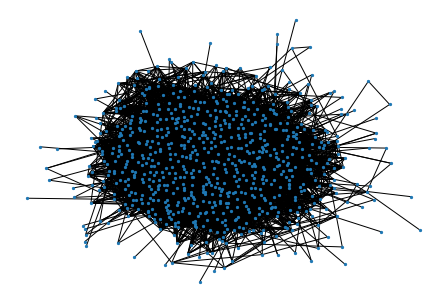

In [6]:
graph=facebook_caltech.graph
pos=nx.drawing.nx_pydot.graphviz_layout(graph)
nx.draw(graph, pos=pos, node_size=5)

In [ ]:
facebook_caltech.diameter

In [ ]:
help(boxes.boxing_)

In [5]:
logpath='../../new_results'

In [ ]:
boxes.boxing_(
    network=facebook_caltech,
    net='_facebook',
    alg_dict=algs_rb_dist_dict,
    box_sizes=range(7),
    path=logpath+'_facebook/',
    preprocessing='distance_dict',
    benchmark_n=10
)

In [ ]:
boxes.io_.canonized_lb_bench(logpath+'_facebook/_facebook_memb_benchmark.txt',alg='memb')

In [ ]:
del(facebook_caltech)

### Enzyme

In [51]:
enzyme=boxes.load.read_max_connected_component(path+'ENZYMES_g296/ENZYMES_g296.edges',0)

In [52]:
boxes.random_sequential(enzyme,3)

computation of shortest path data


[[64, 65, 66, 67, 101, 102, 8, 9, 10, 11, 12, 41, 40, 85, 86, 28, 29],
 [32, 42, 43, 44, 13, 77, 14, 78, 15, 16, 82, 30, 55, 56, 31, 94, 63],
 [110, 79, 80, 17, 18, 19, 58, 59, 60],
 [69, 70, 71, 72, 73, 74, 75],
 [45, 46, 111, 47, 118, 120],
 [114, 116, 53, 54, 52, 117, 124],
 [3, 4, 5, 6, 7, 39, 76, 109, 51, 27],
 [57, 68],
 [0, 1, 2],
 [21, 22, 88, 89, 90, 91, 92],
 [38, 103, 104, 105, 106, 107, 108],
 [96, 33, 34, 35, 95],
 [81, 83, 84],
 [97, 98, 99, 100],
 [112, 113, 115, 62],
 [48, 49, 50, 20, 23, 24, 25, 26, 93],
 [121, 122, 123, 119],
 [61],
 [36, 37],
 [87]]

In [34]:
rb=range(1,32,2)

In [35]:
boxes.boxing_(
    network=enzyme,
    net='enzyme',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path='results/enzyme/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [36]:
lb=generate_lb('results/enzyme/enzyme_memb_benchmark.txt')

In [37]:
boxes.boxing_(
    network=enzyme,
    net='enzyme',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path='results/enzyme/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [38]:
boxes.boxing_(
    network=enzymememe,
    net='enzyme',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path='results/enzyme/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [39]:
del(enzyme)

In [50]:
ball=set([1,2,3])
a=set([5,6])
ball.update(a)

ball.discard(5)
print(ball)
print(a)

{1, 2, 3, 6}
{5, 6}


In [21]:
minnesota_degrees=[deg for node,deg in minnesota.graph.degree()]

In [38]:
del(minnesota)

In [39]:
gc.collect()

58494

In [24]:
enzyme_degrees=[deg for node,deg in enzyme.graph.degree()]

In [25]:
ecoli_degrees=[deg for node,deg in ecoli.graph.degree()]

In [28]:
np.sum(np.array(ecoli_degrees))/2

6890.0

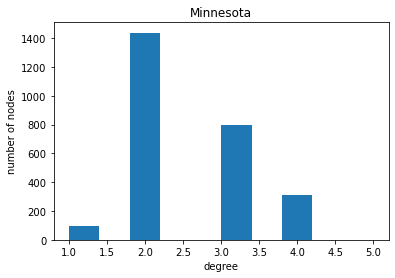

In [35]:
plt.figure()
plt.hist(minnesota_degrees)
plt.title('Minnesota')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.savefig('minnesota_deg.png')
plt.show()

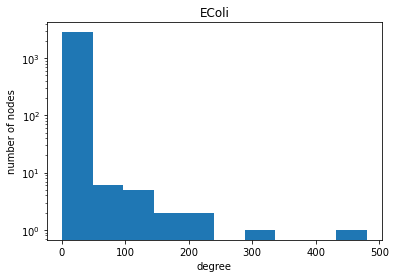

In [36]:
plt.figure()
plt.hist(ecoli_degrees)
plt.yscale('log')
plt.title('EColi')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.savefig('ecoli_deg.png')
plt.show()

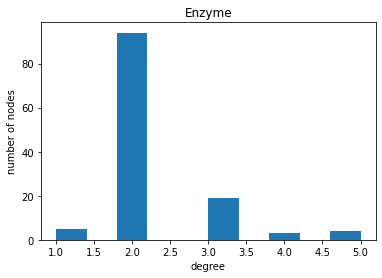

In [37]:
plt.figure()
plt.hist(enzyme_degrees)
plt.title('Enzyme')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.savefig('enzyme_deg.png')
plt.show()

### Minnesota

In [14]:
minnesota=boxes.load.read_max_connected_component('../../networks/minnesota/road-minnesota.mtx',15)

In [15]:
minnesota.graph.number_of_nodes()

2640

In [16]:
minnesota.graph.number_of_edges()

3302

In [ ]:
minnesota.diameter

In [ ]:
lb=np.logspace(0,np.log10(minnesota.diameter),num=10,dtype=int)
rb=np.logspace(0,np.log10(minnesota.diameter),num=20,dtype=int)

In [6]:
logpath='results/'

In [ ]:
# making up for lb_curated mismatch
# we're gonna have mismatch only for fuzzy but that's not a problem - only usable for db

lb=generate_lb('results/minnesota/minnesota_memb_benchmark.txt')

In [ ]:
lb

In [ ]:
boxes.boxing_(
    network=minnesota,
    net='minnesota',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path='results/minnesota/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=minnesota,
    net='minnesota',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path='results/minnesota/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=minnesota,
    net='minnesota',
    alg_dict=lb_shortest_fuzzy,
    box_sizes=lb,
    path=logpath+'minnesota/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=minnesota,
    net='minnesota',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path=logpath+'minnesota/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
del(minnesota)

In [ ]:
gc.collect()

### Grid graphs

#### 2D

In [ ]:
for size in [20,30,40,50]:

    network=boxes.network(nx.grid_graph(dim=(size,size)))
    
    lb=np.logspace(0,np.log10(network.diameter),num=15,dtype=int)
    
    current_net='grid2d_'+str(size)
    
    logpath='../../result_logs/grid2d/'+str(size)+'/'
    
    ###
### boxing
    ###
    
    del(network)
    gc.collect()
    
    
    
    


In [ ]:
gc.collect()

In [43]:
del(grid50)

In [44]:
gc.collect()

7045

In [40]:
grid50=boxes.network(nx.grid_graph(dim=(50,50)))

In [41]:
grid50.graph.number_of_nodes()

2500

In [42]:
grid50.graph.number_of_edges()

4900

In [2]:
help(nx.grid_graph)

Help on function grid_graph in module networkx.generators.lattice:

grid_graph(dim, periodic=False)
    Returns the *n*-dimensional grid graph.
    
    The dimension *n* is the length of the list `dim` and the size in
    each dimension is the value of the corresponding list element.
    
    Parameters
    ----------
    dim : list or tuple of numbers or iterables of nodes
        'dim' is a tuple or list with, for each dimension, either a number
        that is the size of that dimension or an iterable of nodes for
        that dimension. The dimension of the grid_graph is the length
        of `dim`.
    
    periodic : bool or iterable
        If `periodic` is True, all dimensions are periodic. If False all
        dimensions are not periodic. If `periodic` is iterable, it should
        yield `dim` bool values each of which indicates whether the
        corresponding axis is periodic.
    
    Returns
    -------
    NetworkX graph
        The (possibly periodic) grid graph of th

In [ ]:
grid50.diameter

In [ ]:
lb=np.logspace(0,np.log10(grid50.diameter),num=10,dtype=int)
rb=np.logspace(0,np.log10(grid50.diameter),num=20,dtype=int)

In [ ]:
lb=generate_lb('results/grid50/grid50_memb_benchmark.txt')

In [ ]:
lb

In [ ]:
boxes.boxing_(
    network=grid50,
    net='grid50',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path='results/grid50/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=grid50,
    net='grid50',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path=logpath+'grid50/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=grid50,
    net='grid50',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path='results/grid50/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=grid50,
    net='grid50',
    alg_dict=lb_shortest_fuzzy,
    box_sizes=lb,
    path=logpath+'grid50/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [48]:
del(grid30)

In [49]:
gc.collect()

5614

In [45]:
grid30=boxes.network(nx.grid_graph(dim=(30,30)))

In [46]:
grid30.graph.number_of_nodes()

900

In [47]:
grid30.graph.number_of_edges()

1740

In [8]:
grid30.diameter

58

In [9]:
rb=range(1,58,3)

In [10]:
boxes.boxing_(
    network=grid30,
    net='grid30',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path='results/grid30/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [13]:
lb=generate_lb('results/grid30/grid30_memb_benchmark.txt')

In [14]:
boxes.boxing_(
    network=grid30,
    net='grid30',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path='results/grid30/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [15]:
boxes.boxing_(
    network=grid30,
    net='grid30',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path='results/grid30/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [16]:
del(grid30)

In [17]:
gc.collect()

2293

#### UV flower

Based on previous calculations, we try 3 nets:

+ u,v=1,2 (non-fractal)
+ u,v=2,2 fractal, theoretical db: 2
+ u,v=2,4 fractal, theoretical db: 2.6

__UV_12, gen=7__

In [ ]:
network=boxes.network(boxes.generators.uv_flower(1,2,7))

In [ ]:
lb=range(1,8)
current_net='uv_12_g7'
logpath='../../result_logs/uv_12_g7/'

__UV_22, gen=5__

In [50]:
uv225=boxes.network(boxes.generators.uv_flower(2,2,5))

In [51]:
uv225.graph.number_of_nodes()

684

In [52]:
uv225.graph.number_of_edges()

1024

In [ ]:
lb=range(1,32,4)
rb=range(1,32,2)

In [ ]:
lb=generate_lb('results/uv225/uv225_memb_benchmark.txt')

In [ ]:
lb

In [ ]:
logpath='results/'

In [ ]:
boxes.boxing_(
    network=uv225,
    net='uv225',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path=logpath+'uv225/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=uv225,
    net='uv225',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path=logpath+'uv225/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=uv225,
    net='uv225',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path=logpath+'uv225/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=uv225,
    net='uv225',
    alg_dict=lb_shortest_fuzzy,
    box_sizes=lb,
    path=logpath+'uv225/',
    preprocessing='distance_dict',
    benchmark_n=15
)


In [ ]:
del(uv225)
gc.collect()

__UV_24, gen=4__

In [ ]:
network=boxes.network(boxes.generators.uv_flower(2,4,4))
lb=range(1,38,2)

current_net='uv_24_g4'

logpath='../../result_logs/uv_24_g4/'

In [53]:
uv244=boxes.network(boxes.generators.uv_flower(2,4,4))

In [54]:
uv244.graph.number_of_nodes()

1038

In [55]:
uv244.graph.number_of_edges()

1296

In [57]:
del(uv244)

In [58]:
gc.collect()

11155

In [20]:
rb=range(1,38,2)

In [23]:
boxes.boxing_(
    network=uv244,
    net='uv244',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path='results/uv244/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [28]:
lb=generate_lb('results/uv244/uv244_memb_benchmark.txt')

In [29]:
boxes.boxing_(
    network=uv244,
    net='uv244',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path='results/uv244/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [30]:
boxes.boxing_(
    network=uv244,
    net='uv244',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path='results/uv244/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [31]:
del(uv244)
gc.collect()

20

In [ ]:
del(network)
gc.collect()

In [27]:
a=[1,2]
b=[3,4]
c=list(zip(a,b))
print(c)
c.pop()
print(a)
print(b)
print(c)

[(1, 3), (2, 4)]
[1, 2]
[3, 4]
[(1, 3)]


#### SHM model

__SHM_gmxe_5210__

In [59]:
shm5210=boxes.network(boxes.generators.fractal_model(5,2,1,0.))


In [62]:
shm5210.graph.number_of_nodes()

3126

In [63]:
del(shm5210)

In [64]:
gc.collect()

4497

In [ ]:
lb=np.logspace(0,np.log10(shm5210.diameter),num=10,dtype=int)
rb=np.logspace(0,np.log10(shm5210.diameter),num=20,dtype=int)

In [ ]:
lb=generate_lb('results/shm5210/shm5210_memb_benchmark.txt')

In [ ]:
lb

In [ ]:
boxes.boxing_(
    network=shm5210,
    net='shm5210',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path=logpath+'shm5210/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=shm5210,
    net='shm5210',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path=logpath+'shm5210/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=shm5210,
    net='shm5210',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path=logpath+'shm5210/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [ ]:
del(shm5210)


In [ ]:
gc.collect()

__SHM_gmxe_422_0.__

In [65]:
shm4220=boxes.network(boxes.generators.fractal_model(4,2,2,0.))

In [67]:
shm4220.graph.number_of_edges()

1296

In [ ]:
lb=np.logspace(0,np.log10(shm4220.diameter),num=10,dtype=int)
rb=np.logspace(0,np.log10(shm4220.diameter),num=20,dtype=int)

In [ ]:
lb=generate_lb('results/shm4220/shm4220_memb_benchmark.txt')

In [ ]:
lb

In [ ]:
boxes.boxing_(
    network=shm4220,
    net='shm4220',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path=logpath+'shm4220/',
    preprocessing='distance_dict',
    benchmark_n=15
)

boxes.boxing_(
    network=shm4220,
    net='shm4220',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path=logpath+'shm4220/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [ ]:
boxes.boxing_(
    network=shm4220,
    net='shm4220',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path=logpath+'shm4220/',
    preprocessing='distance_dict',
    benchmark_n=15
)

__SHM_gmxe_521_0.5__

In [ ]:
network=boxes.network(boxes.generators.fractal_model(5,2,1,0.5))

In [ ]:
lb=np.logspace(0,np.log10(network.diameter),num=15,dtype=int)

current_net='shm_gmxe_521_0.5'

logpath='../../result_logs/shm_gmxe_521_0.5/'

__SHM_gmxe_422_0.5__

In [ ]:
network=boxes.network(boxes.generators.fractal_model(4,2,2,0.5))

lb=np.logspace(0,np.log10(network.diameter),num=15,dtype=int)

current_net='shm_gmxe_422_0.5'

logpath='../../result_logs/shm_gmxe_422_0.5/'

__SHM_gmxe_521_1__

In [ ]:
network=boxes.network(boxes.generators.fractal_model(5,2,1,1))
lb=range(1,12)
current_net='shm_gmxe_521_1'
logpath='../../result_logs/shm_gmxe_521_1/'


#### HADGM

__HADGM_gmabt_421_0.5_0.5__

In [ ]:
gc.collect()

In [ ]:
network=boxes.network(boxes.generators.hub_attraction_dynamical_growth_model(4,2,1,0.5,0.5))
lb=np.logspace(0,np.log10(network.diameter),num=15,dtype=int)
current_net='hadgm_gmabt_421_0.5_0.5'
logpath='../../result_logs/hadgm_gmabt_421_0.5_0.5/'


__HADGM_gmabt_421_1_0.5__

In [ ]:
network=boxes.network(boxes.generators.hub_attraction_dynamical_growth_model(4,2,1,1,0.5))

lb=range(1,10)

current_net='hadgm_gmabt_421_1_0.5'

logpath='../../result_logs/hadgm_gmabt_421_1_0.5/'


### Enzyme network

In [7]:
enzyme=boxes.load.read_max_connected_component('../../networks/ENZYMES_g296/ENZYMES_g296.edges',0)
lb=range(1,32,2)

current_net='enzyme'

logpath='../../result_logs/enzyme/'

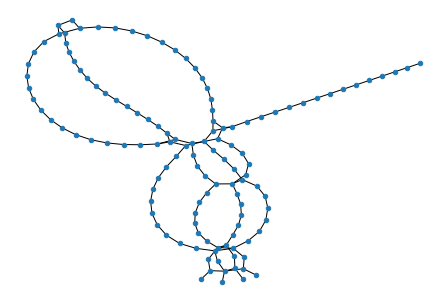

In [14]:
graph=enzyme.graph
pos=nx.drawing.nx_pydot.graphviz_layout(graph)

plt.figure()

nx.draw(graph, pos=pos, node_size=20)

plt.savefig('enzyme_vis.png')
plt.show()

In [13]:
enzyme.graph.number_of_edges()

141

### EColi

In [9]:
ecoli=boxes.load.read_max_connected_component('../../networks/ecoli/ecoli.txt',1)

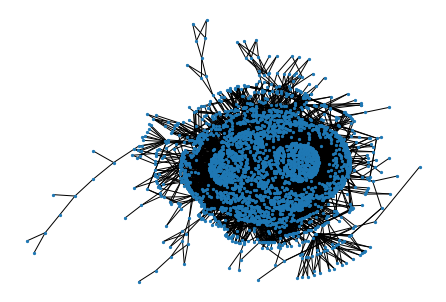

In [10]:
graph=ecoli.graph
pos=nx.drawing.nx_pydot.graphviz_layout(graph)
nx.draw(graph, pos=pos, node_size=5)

In [4]:
ecoli.diameter


18

In [6]:
ecoli.graph.number_of_nodes()

2859

In [7]:
ecoli.graph.number_of_edges()

6890

In [9]:
rb=range(1,18)

In [10]:
boxes.boxing_(
    network=ecoli,
    net='ecoli',
    alg_dict=algs_rb_dist_dict,
    box_sizes=rb,
    path=logpath+'ecoli/',
    preprocessing='distance_dict',
    benchmark_n=15
)

In [13]:
lb=generate_lb('results/ecoli/ecoli_memb_benchmark.txt')

In [14]:
lb

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [15]:
boxes.boxing_(
    network=ecoli,
    net='ecoli',
    alg_dict=algs_lb_dist_dict,
    box_sizes=lb,
    path=logpath+'ecoli/',
    preprocessing='distance_dict',
    benchmark_n=15
)

boxes.boxing_(
    network=ecoli,
    net='ecoli',
    alg_dict=algs_lb_shortest_paths,
    box_sizes=lb,
    path=logpath+'ecoli/',
    preprocessing='shortest_paths',
    benchmark_n=15
)

In [16]:
exec_time, lb_nb=boxes.io_.canonized_lb_bench(logpath+'ecoli/ecoli_greedy_benchmark.txt','greedy')

In [17]:
lb_nb

[(3,
  array([633., 630., 622., 631., 626., 628., 632., 630., 630., 626., 633.,
         626., 630., 629., 630.])),
 (5,
  array([140., 139., 142., 140., 142., 144., 141., 142., 143., 138., 143.,
         138., 145., 139., 138.])),
 (7,
  array([48., 48., 51., 50., 51., 51., 48., 47., 50., 52., 48., 51., 51.,
         50., 50.])),
 (9,
  array([17., 15., 15., 15., 17., 16., 16., 14., 16., 17., 16., 15., 16.,
         15., 15.])),
 (11,
  array([ 8.,  9.,  8.,  7.,  8., 10.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,
          7.,  7.])),
 (13, array([5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 5., 4.])),
 (15, array([4., 4., 4., 3., 4., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3.])),
 (17, array([2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])),
 (19, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))]

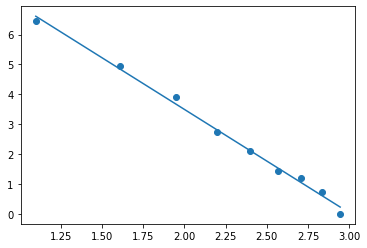

In [22]:
plt.figure()
x,y=np.log([item[0] for item in lb_nb]),np.log([np.mean(item[1]) for item in lb_nb])
plt.scatter(x,y)
plt.plot(x,x*params[0]+params[1])
# plt.yscale('log')
# plt.xscale('log')
plt.show()

In [20]:
params=np.polyfit(np.log([item[0] for item in lb_nb]),
                  np.log([np.mean(item[1]) for item in lb_nb]),deg=1)

In [23]:
params

array([-3.45713462, 10.4091529 ])